In [66]:
import scanpy as sc

selected_cluster = sc.read("data/significant_subpopulations/cluster4376.h5ad")

In [2]:
selected_cluster

AnnData object with n_obs × n_vars = 655 × 5000
    obs: 'APOE_class', 'Brain.Region', 'SORT', 'Braak.stage', 'Disease.Group', 'Amyloid', 'Brain.weight', 'PMI.hr.', 'Race', 'Age', 'RIN', 'total_counts', 'pct_counts_mt', 'droplet_FDR', 'doublefinder', 'n_genes', 'sample', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'donor_id', 'Age_group', 'PMI_group', 'RIN_group', 'Major_celltypes', 'Author_Annotation', 'NP.Diagonis', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
    var: 'mt', 'ribo', 'hb', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 

In [3]:
rest_data = sc.read("data/dataset_glutamatergic_latest_state.h5ad")

In [44]:
import numpy as np
import pandas as pd
rest_data.obs["selected"] = pd.Categorical(np.zeros(282930)).set_categories([0, 1])

In [30]:
rest_data.obs["selected"]

AAACCTGAGCGAAGGG-C0017    0.0
AAACCTGCAAGTTCTG-C0017    0.0
AAACCTGGTGAGGGAG-C0017    0.0
AAACCTGGTGTATGGG-C0017    0.0
AAACCTGGTTGAGTTC-C0017    0.0
                         ... 
TTGTCGTGATGC-D0200        0.0
TTTGAGTAGACG-D0200        0.0
TTTGCCCCTTTG-D0200        0.0
TTTGGATGACCC-D0200        0.0
TTTGGTAGTTTA-D0200        0.0
Name: selected, Length: 282930, dtype: category
Categories (1, float64): [0.0]

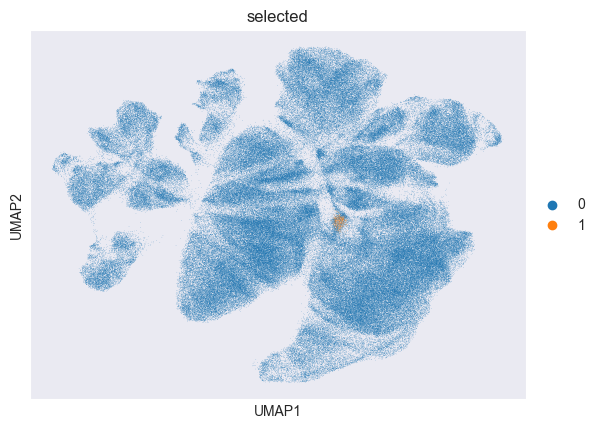

In [65]:
sc.pl.umap(rest_data, color=["selected"])

In [45]:
rest_data.obs.loc[selected_cluster.obs.index, "selected"] = 1

In [42]:
rest_data.obs.loc[selected_cluster.obs.index]["selected"]

AAACGGGTCCTGCAGG-C0019    0.0
AACTCTTGTGTCCTCT-C0019    0.0
AACTTTCGTCCGTGAC-C0019    0.0
AACTTTCGTTGACGTT-C0019    0.0
AAGTCTGGTGGCTCCA-C0019    0.0
                         ... 
AGGGTGAGTGACCAAG-C0020    0.0
CATCGGGGTTGGGACA-C0020    0.0
CCGGGATCAAGTCTGT-C0020    0.0
CGATTGATCTTGAGAC-C0020    0.0
TCGAGGCGTCGAACAG-C0020    0.0
Name: selected, Length: 655, dtype: category
Categories (1, float64): [0.0]

In [52]:
sc.pp.normalize_total(rest_data, target_sum=1e4)

# Log1p transform (log(x+1))
sc.pp.log1p(rest_data)

In [60]:
sc.tl.rank_genes_groups(rest_data, groupby="selected", use_raw=False)

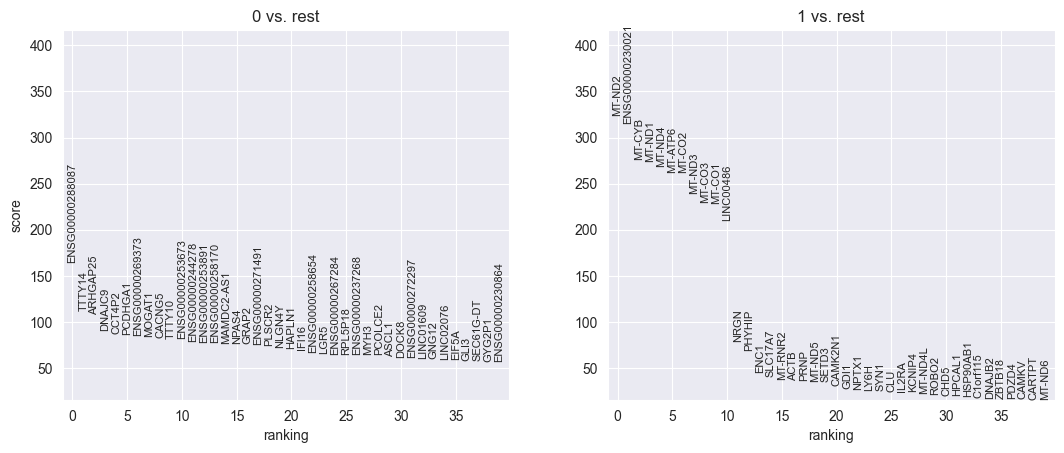

In [71]:
sc.pl.rank_genes_groups(rest_data, groupby="selected",  gene_symbols="feature_name", n_genes=40, figsize=(15, 15))

In [70]:
selected_cluster.obs["Brain.Region"]

AAACGGGTCCTGCAGG-C0019    Frontal Cx (BA9)
AACTCTTGTGTCCTCT-C0019    Frontal Cx (BA9)
AACTTTCGTCCGTGAC-C0019    Frontal Cx (BA9)
AACTTTCGTTGACGTT-C0019    Frontal Cx (BA9)
AAGTCTGGTGGCTCCA-C0019    Frontal Cx (BA9)
                                ...       
AGGGTGAGTGACCAAG-C0020    Frontal Cx (BA9)
CATCGGGGTTGGGACA-C0020    Frontal Cx (BA9)
CCGGGATCAAGTCTGT-C0020    Frontal Cx (BA9)
CGATTGATCTTGAGAC-C0020    Frontal Cx (BA9)
TCGAGGCGTCGAACAG-C0020    Frontal Cx (BA9)
Name: Brain.Region, Length: 655, dtype: category
Categories (2, object): ['Frontal Cx (BA9)', 'Precuneous (BA7)']

In [ ]:
kcng3

In [82]:
for i in rest_data.uns["rank_genes_groups"]["names"]["1"]:
    if i == "ENSG00000171126":
        print(i)